# A/B Testing for Campaign Optimization

This project involved conducting an A/B test to determine the optimal campaign strategy for a company aiming to enhance customer acquisition and improve key performance indicators (KPIs). The analysis compared the performance of a Control Campaign against a Test Campaign across a set duration, leveraging real-world campaign data to provide actionable insights.

[Dataset source](https://www.kaggle.com/datasets/amirmotefaker/ab-testing-dataset?resource=download&select=control_group.csv)

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

# loading and preprocessing data

control_group = pd.read_csv('Data/control_group.csv', sep=';')
test_group = pd.read_csv('Data/test_group.csv', sep=';')

columns = ['CampaignName', 'Date', 'Spend', 'Impressions', 'Reach', 'WebsiteClicks',
                           'Searches', 'ViewContent', 'AddToCart', 'Purchase']
for df in [control_group, test_group]:
    df.columns = columns

cols_to_fill = ['Impressions', 'Reach', 'WebsiteClicks', 'Searches', 'ViewContent', 'AddToCart', 'Purchase']
control_means = control_group[cols_to_fill].mean()
test_means = test_group[cols_to_fill].mean()
for col in cols_to_fill:
    control_group[col] = control_group[col].fillna(control_means[col])
    test_group[col] = test_group[col].fillna(test_means)

control_group['Date'] = pd.to_datetime(control_group['Date'], format="%d.%m.%Y")
test_group['Date'] = pd.to_datetime(test_group['Date'], format="%d.%m.%Y")

# merge two dataframes
data = pd.concat([control_group, test_group], ignore_index=True)
data

,CampaignName,Date,Spend,Impressions,Reach,WebsiteClicks,Searches,ViewContent,AddToCart,Purchase
0,Control Campaign,2019-08-01,2280,82702.000000,56930.000000,7016.000000,2290.000000,2159.000000,1819.0,618.000000
1,Control Campaign,2019-08-02,1757,121040.000000,102513.000000,8110.000000,2033.000000,1841.000000,1219.0,511.000000
2,Control Campaign,2019-08-03,2343,131711.000000,110862.000000,6508.000000,1737.000000,1549.000000,1134.0,372.000000
3,Control Campaign,2019-08-04,1940,72878.000000,61235.000000,3065.000000,1042.000000,982.000000,1183.0,340.000000
4,Control Campaign,2019-08-05,1835,109559.758621,88844.931034,5320.793103,2221.310345,1943.793103,1300.0,522.793103
5,Control Campaign,2019-08-06,3083,109076.000000,87998.000000,4028.000000,1709.000000,1249.000000,784.0,764.000000
6,Control Campaign,2019-08-07,2544,142123.000000,127852.000000,2640.000000,1388.000000,1106.000000,1166.0,499.000000
7,Control Campaign,2019-08-08,1900,90939.000000,65217.000000,7260.000000,3047.000000,2746.000000,930.0,462.000000
8,Control Campaign,2019-08-09,2813,121332.000000,94896.000000,6198.000000,2487.000000,2179.000000,645.0,501.000000
9,Control Campaign,2019-08-10,2149,117624.000000,91257.000000,2277.000000,2475.000000,1984.000000,1629.0,734.000000


In [71]:
# analyze

metrics = data.groupby('CampaignName').sum(numeric_only=True)

# Conversion
metrics['ConversionRate'] = metrics['Purchase'] / metrics['WebsiteClicks']

# CTR
metrics['CTR'] = metrics['WebsiteClicks'] / metrics['Impressions']

# CPA
metrics['CPA'] = metrics['Spend'] / metrics['Purchase']

metrics

,Spend,Impressions,Reach,WebsiteClicks,Searches,ViewContent,AddToCart,Purchase,ConversionRate,CTR,CPA
CampaignName,,,,,,,,,,,
Control Campaign,68653,3.286793e+06,2.665348e+06,159623.793103,66639.310345,58313.793103,39000.0,15683.793103,0.098255,0.048565,4.377321
Test Campaign,76892,2.237544e+06,1.604747e+06,180970.000000,72569.000000,55740.000000,26446.0,15637.000000,0.086407,0.080879,4.917312


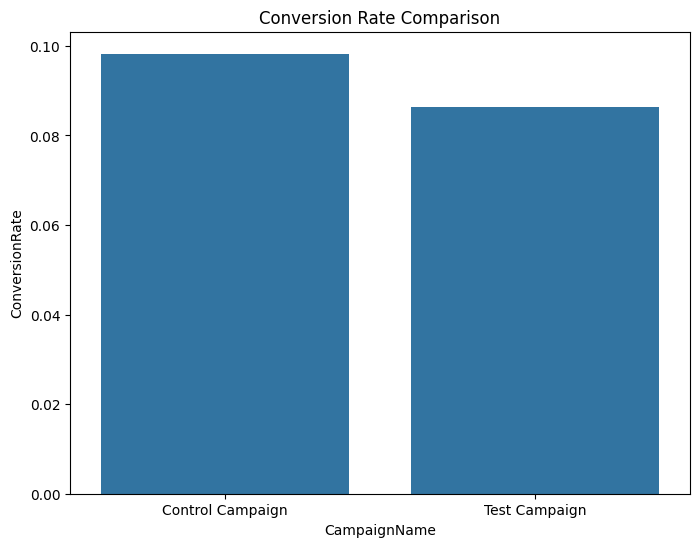

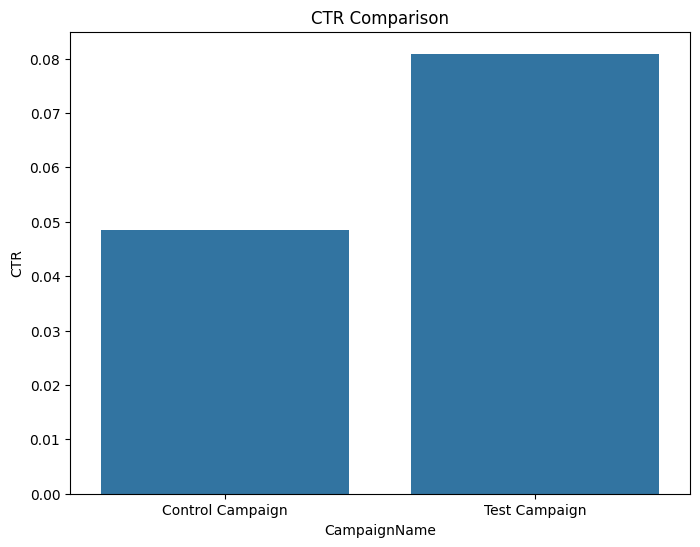

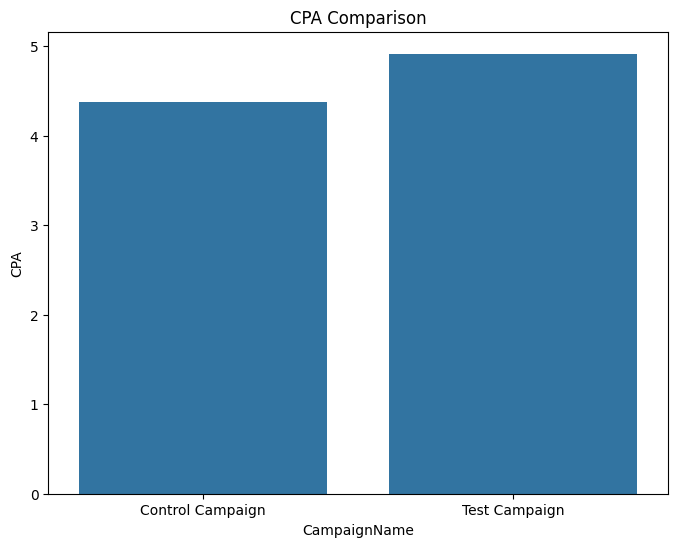

In [72]:
# visualization

plt.figure(figsize=(8, 6))
sns.barplot(x=metrics.index, y=metrics['ConversionRate'])
plt.title('Conversion Rate Comparison')
plt.show()

plt.figure(figsize=(8, 6))
sns.barplot(x=metrics.index, y=metrics['CTR'])
plt.title('CTR Comparison')
plt.show()

plt.figure(figsize=(8, 6))
sns.barplot(x=metrics.index, y=metrics['CPA'])
plt.title('CPA Comparison')
plt.show()

In [73]:
# T-tests
control_conversion = control_group['Purchase'] / control_group['WebsiteClicks']
control_conversion = control_conversion.replace([np.inf, -np.inf], 0).dropna()
test_conversion = test_group['Purchase'] / test_group['WebsiteClicks']
test_conversion = test_conversion.replace([np.inf, -np.inf], 0).dropna()
t_stat_conversion, p_value_conversion = ttest_ind(control_conversion, test_conversion)
print(f"T-test for Conversion: t={t_stat_conversion}, p={p_value_conversion}")

control_ctr = control_group['WebsiteClicks'] / control_group['Impressions']
control_ctr = control_ctr.replace([np.inf, -np.inf], 0).dropna()
test_ctr = test_group['WebsiteClicks'] / test_group['Impressions']
test_ctr = test_ctr.replace([np.inf, -np.inf], 0).dropna()
t_stat_ctr, p_value_ctr = ttest_ind(control_ctr, test_ctr)
print(f"T-test for CTR: t={t_stat_ctr}, p={p_value_ctr}")

control_cpa = control_group['Spend'] / control_group['Purchase']
control_cpa = control_cpa.replace([np.inf, -np.inf], 0).dropna()
test_cpa = test_group['Spend'] / test_group['Purchase']
test_cpa = test_cpa.replace([np.inf, -np.inf], 0).dropna()
t_stat_cpa, p_value_cpa = ttest_ind(control_cpa, test_cpa)
print(f"T-test for CPA: t={t_stat_cpa}, p={p_value_cpa}")

T-test for Conversion: t=1.488079079877726, p=0.14214717143258024
T-test for CTR: t=-3.9962501835865276, p=0.0001839852631242612
T-test for CPA: t=-1.406289257896576, p=0.16497351064327181


### Summary of Results

1. **Conversion Rate**:
   - **Control Campaign**: 0.0983 (9.83%)
   - **Test Campaign**: 0.0864 (8.64%)
   - **T-test**: t=1.4881, p=0.1421
   - **Conclusion**: No statistically significant difference in conversion rates between the two campaigns.

2. **Click-Through Rate (CTR)**:
   - **Control Campaign**: 0.0486 (4.86%)
   - **Test Campaign**: 0.0809 (8.09%)
   - **T-test**: t=-3.9963, p=0.0002
   - **Conclusion**: A statistically significant difference in CTR, with the Test Campaign performing better.

3. **Cost Per Action (CPA)**:
   - **Control Campaign**: 4.3773
   - **Test Campaign**: 4.9173
   - **T-test**: t=-1.4063, p=0.1650
   - **Conclusion**: No statistically significant difference in CPA between the two campaigns.

### Overall Conclusion:
While the Test Campaign showed a significantly higher CTR, it had a lower conversion rate and a higher CPA compared to the Control Campaign, indicating that further optimization is needed to improve conversions despite increased engagement.